In [1]:
!pwd

/Users/hontiktse/LinearRL/google-research/minigrid_basics


In [2]:
from os.path import join
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = join(".", "experiments", "reward_shaping", "MiniGrid-MaxEntFourRooms-v0")

In [4]:
with open(join(path, "baseline-0-0.0-0.3-0.pkl"), "rb") as f:
    data = pickle.load(f)

In [8]:
# plt.plot(data['t'], data['perf'])

In [11]:
def load_data(path, name):
    with open(join(path, name), "rb") as f:
        return pickle.load(f)

In [24]:
def load_setting(path, rep, i_eigen, r_shaped_weight, lr, n_seeds=20):

    
    datas = []
    for seed in range(1, n_seeds + 1):

        # construct file name
        exp_name = [rep, i_eigen, r_shaped_weight, lr, seed]
        exp_name = [str(x) for x in exp_name]
        exp_name = '-'.join(exp_name) 

        with open(join(path, exp_name + ".pkl"), "rb") as f:
            data = pickle.load(f)

        datas.append(data['perf'])

    # plot_mean_and_conf_interval(data['t'], datas, label=exp_name)
    return data['t'], datas, exp_name

In [13]:
def plot_mean_and_conf_interval(x, y, label, color, alpha):

    """
    x: x axis
    y: data, each row contains one trial
    """
    y_mean = np.mean(y, axis=0)
    y_std = np.std(y, axis=0)

    n_trials = np.array(y).shape[0]

    y_interval = 1.96 / np.sqrt(n_trials) * y_std

    plt.plot(x, y_mean, label=label, color=color, alpha=alpha)
    plt.fill_between(x, y_mean - y_interval, y_mean + y_interval, alpha=0.05, color=color)

In [44]:
def construct_alphas(settings):
        n = len(settings)
        alphas = np.linspace(0.1, 1, n + 1)[1:]
        return alphas

### MiniGrid-MaxEntFourRooms-v0

In [49]:
env_name = "MiniGrid-MaxEntFourRooms-v0"
path = join(".", "experiments", "reward_shaping", env_name)

Text(0, 0.5, 'Undiscounted Return')

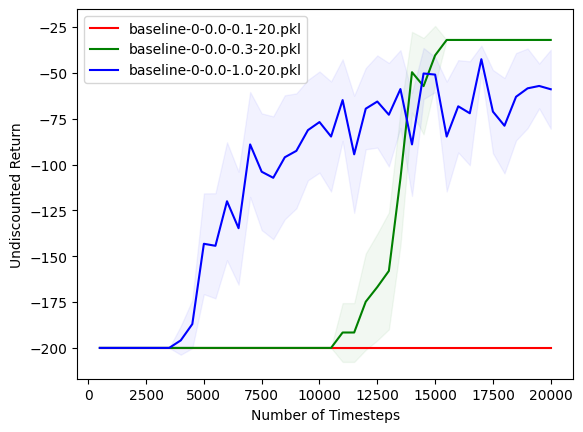

In [50]:
# baseline
lrs = [0.1, 0.3, 1.0]
colors = ["red", "g", "b"]
seeds = range(1, 20 + 1)

for lr, c in zip(lrs, colors):
    data_for_all_seeds = []
    for seed in seeds:
        name = f"baseline-0-0.0-{lr}-{seed}.pkl"
        data = load_data(path, name)
        data_for_all_seeds.append(data['perf'])   # get performance for all seeds

    plot_mean_and_conf_interval(data['t'], data_for_all_seeds, name, c, 1)

plt.legend()
plt.xlabel("Number of Timesteps")
plt.ylabel("Undiscounted Return")

# best learning rate: 0.3

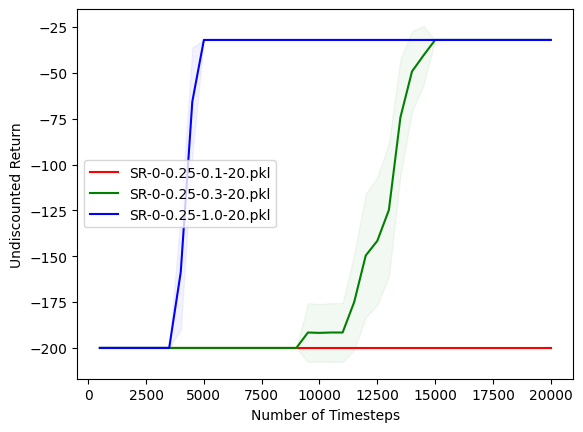

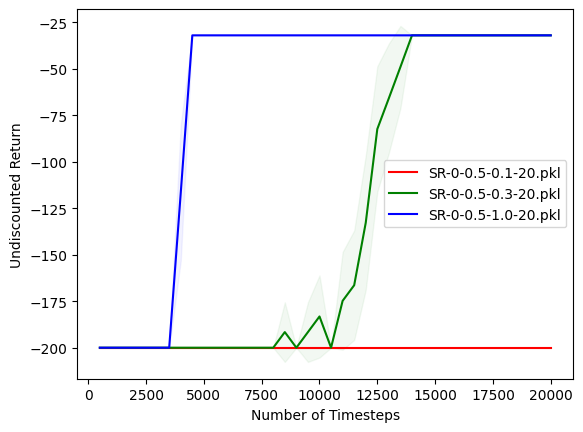

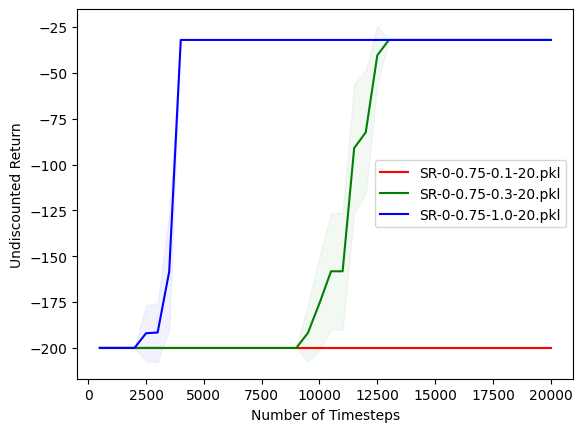

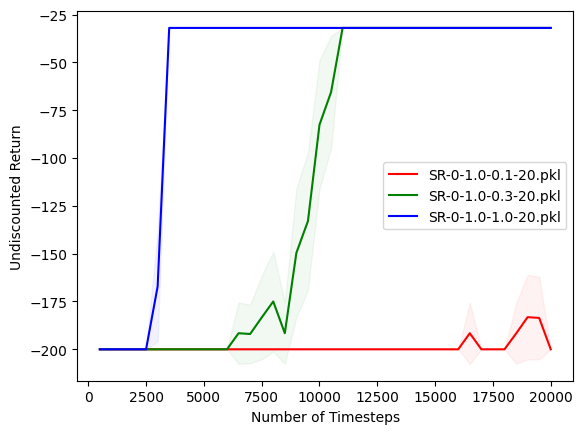

In [51]:
# SR
r_shaped_weights = [0.25, 0.5, 0.75, 1.0]
lrs = [0.1, 0.3, 1.0]
colors = ["red", "g", "b"]
seeds = range(1, 20 + 1)

for r_w in r_shaped_weights:
    for lr, c in zip(lrs, colors):
        data_for_all_seeds = []
        for seed in seeds:
            name = f"SR-0-{r_w}-{lr}-{seed}.pkl"
            data = load_data(path, name)
            data_for_all_seeds.append(data['perf'])   # get performance for all seeds
    
        plot_mean_and_conf_interval(data['t'], data_for_all_seeds, name, c, 1)

    plt.legend()
    plt.xlabel("Number of Timesteps")
    plt.ylabel("Undiscounted Return")
    plt.show()

# best learning rate: 1 for all r_shaped_weights

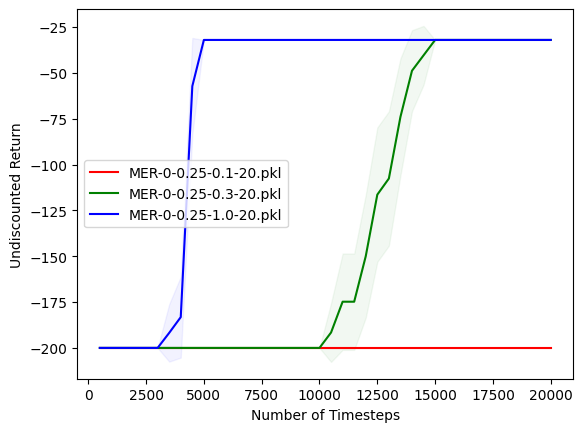

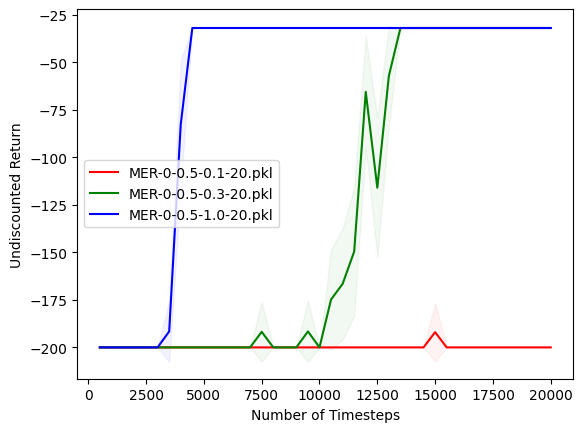

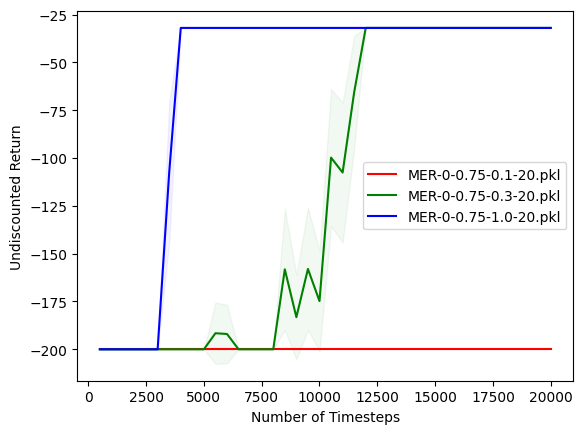

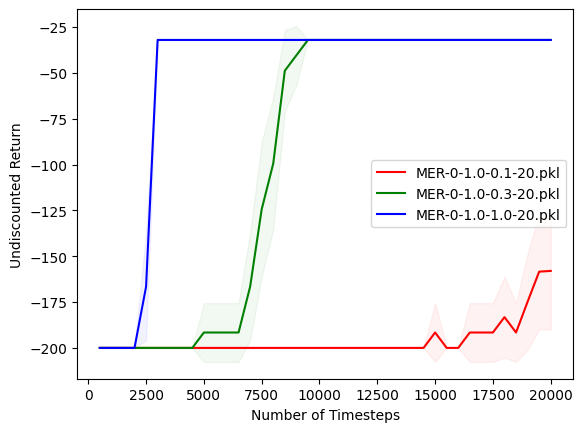

In [52]:
# MER
r_shaped_weights = [0.25, 0.5, 0.75, 1.0]
lrs = [0.1, 0.3, 1.0]
colors = ["red", "g", "b"]
seeds = range(1, 20 + 1)

for r_w in r_shaped_weights:
    for lr, c in zip(lrs, colors):
        data_for_all_seeds = []
        for seed in seeds:
            name = f"MER-0-{r_w}-{lr}-{seed}.pkl"
            data = load_data(path, name)
            data_for_all_seeds.append(data['perf'])   # get performance for all seeds
    
        plot_mean_and_conf_interval(data['t'], data_for_all_seeds, name, c, 1)

    plt.legend()
    plt.xlabel("Number of Timesteps")
    plt.ylabel("Undiscounted Return")
    plt.show()

# best learning rate: 1 for all r_shaped_weights

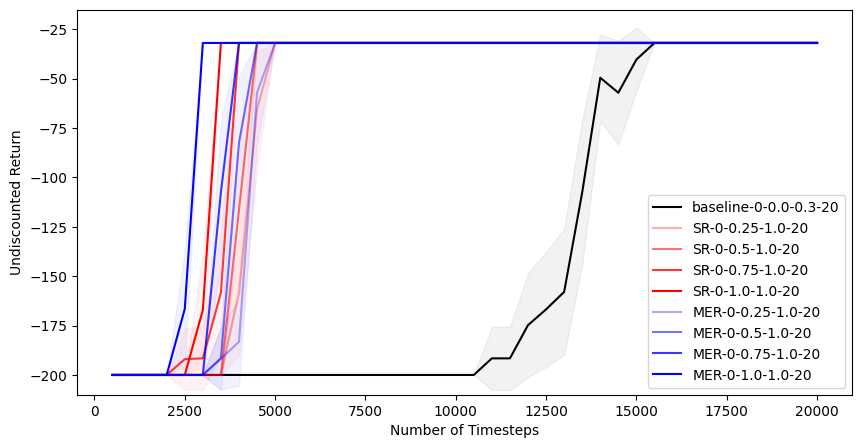

In [54]:
### plot best scenario
plt.figure(figsize=(10, 5))

# baseline
x, y, name = load_setting(path, "baseline", 0, 0.0, 0.3)
plot_mean_and_conf_interval(x, y, label=name, color="black", alpha=1)

# SR and MER
r_shaped_weights = [0.25, 0.5, 0.75, 1.0]
for rep, best_lr, color in zip(["SR", "MER"], [1.0, 1.0], ['red', 'blue']):
    for i_eigen in [0]:
        for r_shaped_weight, alpha in zip(r_shaped_weights, construct_alphas(r_shaped_weights)):

            x, y, name = load_setting(path, rep, i_eigen, r_shaped_weight, best_lr)
            plot_mean_and_conf_interval(x, y, label=name, color=color, alpha=alpha)

plt.legend()
plt.ylim([-210, None])
plt.xlabel("Number of Timesteps")
plt.ylabel("Undiscounted Return")
plt.savefig("fourrooms.png")

### MiniGrid-MaxEntFourRooms2-v0

In [55]:
env_name = "MiniGrid-MaxEntFourRooms2-v0"
path = join(".", "experiments", "reward_shaping", env_name)

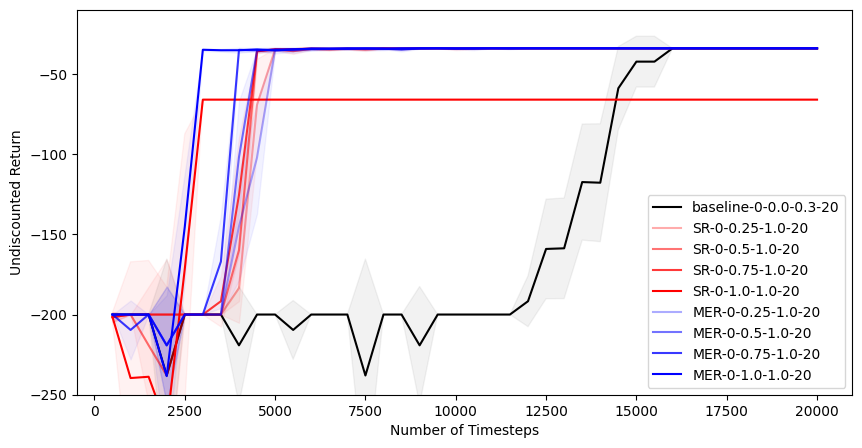

In [57]:
### plot best scenario
plt.figure(figsize=(10, 5))
# baseline
x, y, name = load_setting(path, "baseline", 0, 0.0, 0.3)
plot_mean_and_conf_interval(x, y, label=name, color="black", alpha=1)

# SR and MER
r_shaped_weights = [0.25, 0.5, 0.75, 1.0]
for rep, best_lr, color in zip(["SR", "MER"], [1.0, 1.0], ['red', 'blue']):
    for i_eigen in [0]:
        for r_shaped_weight, alpha in zip(r_shaped_weights, construct_alphas(r_shaped_weights)):

            x, y, name = load_setting(path, rep, i_eigen, r_shaped_weight, best_lr)
            plot_mean_and_conf_interval(x, y, label=name, color=color, alpha=alpha)

plt.legend()
plt.ylim([-250, None])
plt.xlabel("Number of Timesteps")
plt.ylabel("Undiscounted Return")
plt.savefig("fourrooms2.png")